<a href="https://colab.research.google.com/github/Kunal112137/Brain-Tumor-Detection/blob/main/BrainTumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 13.2 MB/s eta 0:00:00


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/Brain Tumor Detection"):
  for filename in filenames:
    print(os.path.join(dirname, filename))

Reading Image Data into Python Objects

In [ ]:
import cv2

X = []
Y = []
image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']

In [ ]:
for i in labels:
  folderPath = os.path.join(r'Training',i)
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(image_size,image_size))
    X.append(img)
    Y.append(i)

  folderPath = os.path.join(r'Testing',i)
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(image_size,image_size))
    X.append(img)
    Y.append(i)

X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

((7023, 150, 150), (7023,))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving X and Y as an object

In [ ]:
import pickle

Randomization of Data

In [ ]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=42)

Spliiting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

Encoding Categorical Data

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6320, 150, 150), (6320,), (703, 150, 150), (703,))

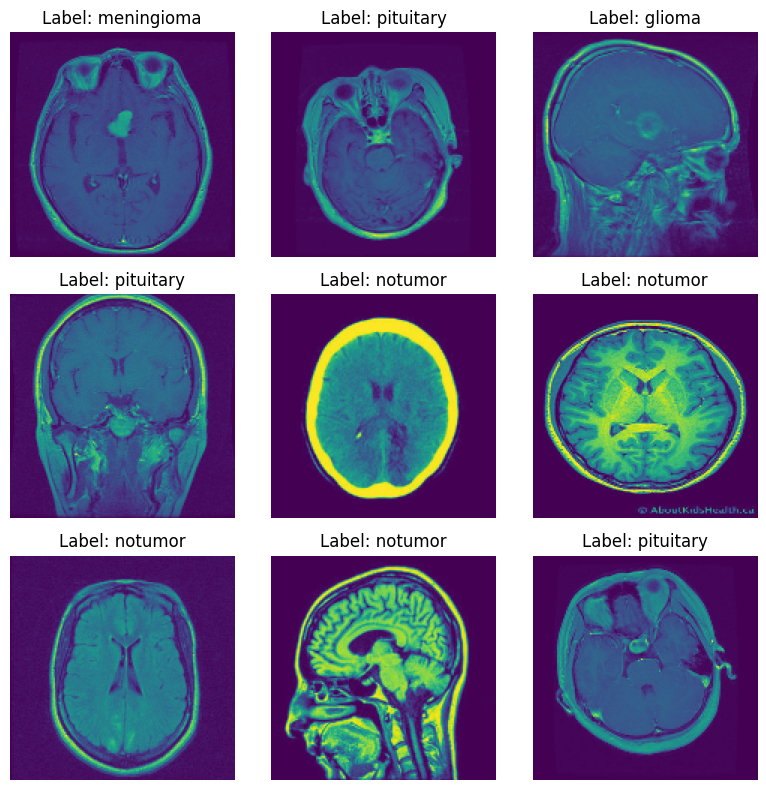

In [ ]:
plt.figure(figsize=(8, 8))  # Set the figure size

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import keras

In [ ]:
y_train_new = []
for i in Y_train:
  y_train_new.append(labels.index(i))
Y_train = y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

y_test_new = []
for i in Y_test:
  y_test_new.append(labels.index(i))
Y_test = y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

CNN Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import visualkeras

In [ ]:
# MODEL : Architecture:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


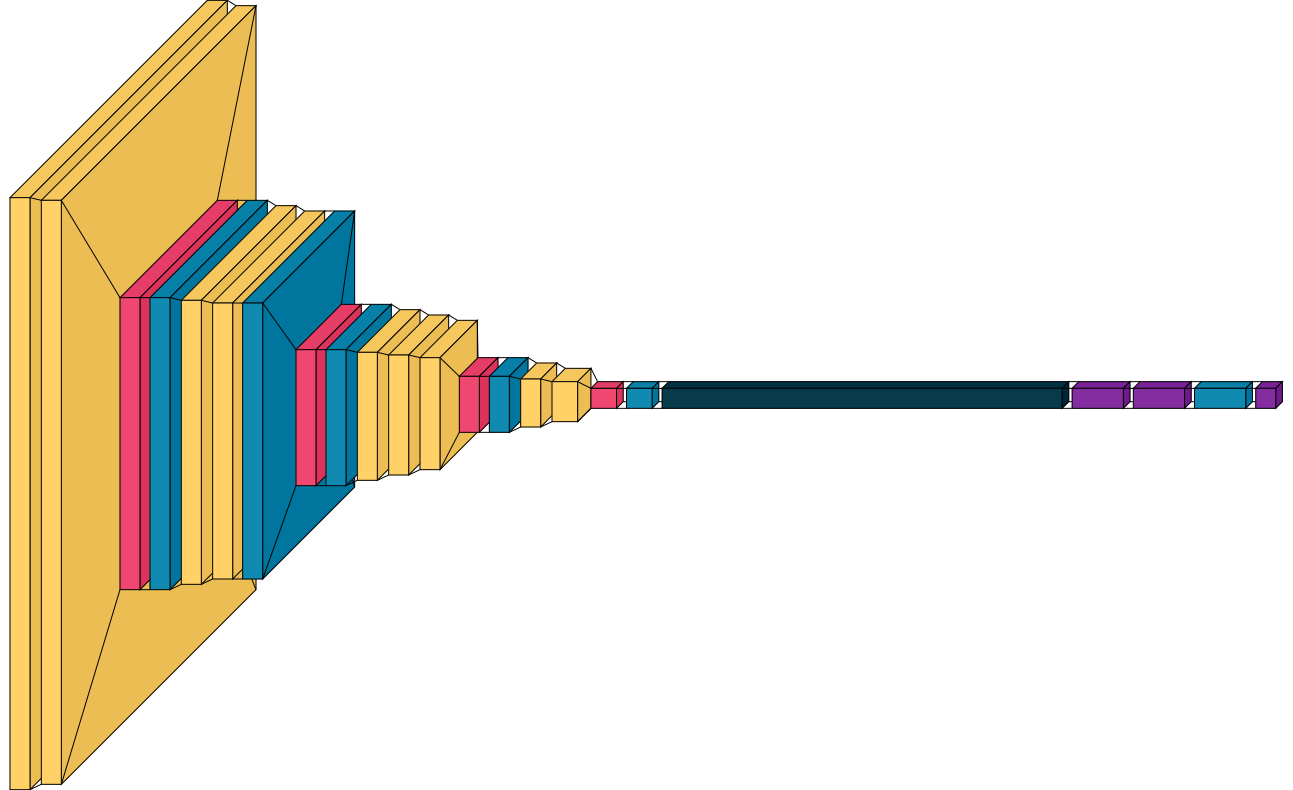

In [ ]:
visualkeras.layered_view(model).show()
visualkeras.layered_view(model, to_file='output.png')
visualkeras.layered_view(model, to_file='output.png').show()
visualkeras.layered_view(model)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,446,468 (16.96 MB)

 Trainable params: 4,446,468 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.metrics  import Precision
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy', 'Precision'])

Callback Function

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3,start_from_epoch=10)

## Fitting Model custome model:

In [ ]:
history = model.fit(X_train ,Y_train ,epochs= ,callbacks=[callback] , validation_split =0.1)

Epoch 1/5
  3/178 ━━━━━━━━━━━━━━━━━━━━ 16:51 6s/step - Precision: 0.2764 - accuracy: 0.2899 - loss: 11.3647

KeyboardInterrupt: 

Evaluation of Model

1. 35. Epochs = 90.6% acc
2. 5. Epochs = 84% acc

In [ ]:
model.evaluate(X_test,Y_test)

## Model VGG INFERENCE

In [ ]:
import numpy as np
X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
X_test = np.repeat(X_test[..., np.newaxis], 3, -1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
his = vgg_model.fit(X_train, Y_train, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 186ms/step - accuracy: 0.6780 - loss: 1.1602 - val_accuracy: 0.8813 - val_loss: 0.3265
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.8801 - loss: 0.2888 - val_accuracy: 0.9035 - val_loss: 0.2444
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.9237 - loss: 0.2073 - val_accuracy: 0.9201 - val_loss: 0.2293
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.9437 - loss: 0.1624 - val_accuracy: 0.9328 - val_loss: 0.1849
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9429 - loss: 0.1487 - val_accuracy: 0.9335 - val_loss: 0.1719
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.9492 - loss: 0.1341 - val_accuracy: 0.9391 - val_loss: 0.1910
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.9565 - loss: 0.1178 - val_accuracy: 0.9035 - val_loss: 0.2463
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9690 - loss: 0

In [ ]:
loss, acc = vgg_model.evaluate(X_test, Y_test)
print(f"VGG16 Accuracy: {acc:.4f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.9003 - loss: 0.2667
VGG16 Accuracy: 0.9075


In [ ]:
modelPath = r'/content/drive/MyDrive/Colab Notebooks/Brain Tumor Detection/Models'
model.save(os.path.join(modelPath,'brain-tumor-1/0.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Plotting curve

<Axes: >

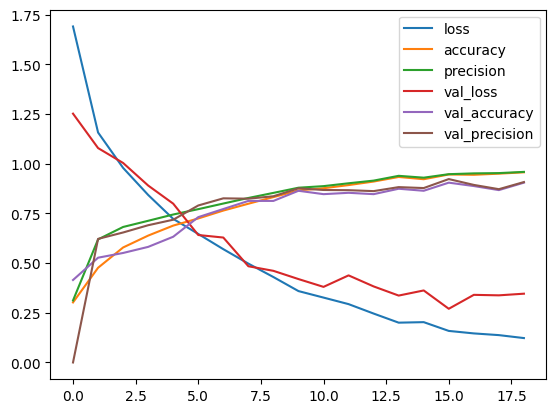

In [ ]:
pd.DataFrame(history.history).plot()

<Axes: >

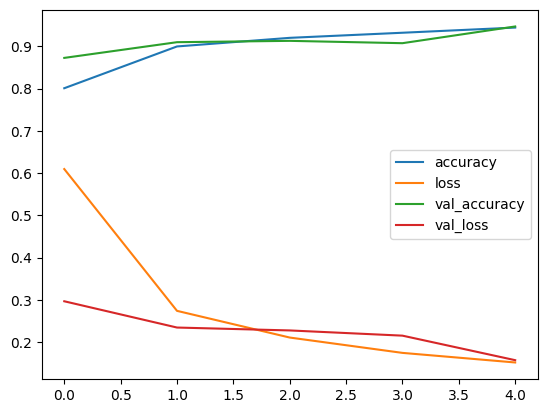

In [ ]:
pd.DataFrame(his.history).plot()

Load the model

## Comparision of our model with State of art model VGG16

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrames
df1 = pd.DataFrame(history.history)
df1["epoch"] = df1.index
df1["model"] = "Model 1"

df2 = pd.DataFrame(his.history)
df2["epoch"] = df2.index
df2["model"] = "Model 2"

# Combine and melt
df = pd.concat([df1, df2], ignore_index=True)
df_melted = df.melt(id_vars=["epoch", "model"], var_name="metric", value_name="value")

# Plot with seaborn
g = sns.relplot(
    data=df_melted,
    x="epoch", y="value",
    hue="model", style="model",
    kind="line",
    col="metric", col_wrap=2,  # Change if you have more/less metrics
    facet_kws={'sharey': False}
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Comparison of Training Histories")
plt.show()

NameError: name 'history' is not defined

In [ ]:
from keras.models import load_model
model = load_model(os.path.join(modelPath,'brain-tumor-1/0.h5'))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
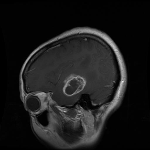

In [ ]:
X_test[0]

Predicting a new output

In [ ]:
y_pred = model.predict(X_test)
print(f"Predicted : {labels[np.argmax(y_pred[0])]} \nActual : {labels[np.argmax(Y_test[0])]}")

11/11 [==============================] - 0s 26ms/step
Predicted : glioma_tumor 
Actual : glioma_tumor
